In [1]:
# Installations
# pip install ipykernel nbformat pandas seaborn plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
import requests

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from io import StringIO

url = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv"
response = requests.get(url, verify=False)

# Convert bytes type object to file type object
file_like = StringIO(response.text)

# Read CSV file
df = pd.read_csv(file_like)

df.info()

# Option 2:
# url = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv"
# df = pd.read_csv(url)
# df.info()

/Users/rodripinedo/Documents/4GEEKS/repos/my_bootcamp/PRACTICCE_1/titanic/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# Data Set random static
df.sample(10, random_state=2024)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [4]:
# Find duplicates
df = df.drop_duplicates()
df.shape

# There aren't duplicates

(891, 12)

In [5]:
df['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [6]:
# Drop colums PassengerID, Name, Ticket
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [7]:
df.info()

# Survived, Pclass, Sex, Cabin, Embarked are a categorical fact, because it does not make sense to extract descriptive metrics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
# Verify NaN by Age and Survived
df[["Age", "Survived"]][df["Age"].isna()]

,Age,Survived
5,NaN,0
17,NaN,1
19,NaN,1
26,NaN,0
28,NaN,1
...,...,...
859,NaN,0
863,NaN,0
868,NaN,0
878,NaN,0


In [9]:
# Sum the Passengers survived with NaN Age
df[["Age", "Survived"]][df["Age"].isna()]["Survived"].sum()

np.int64(52)

In [10]:
# Transform to categorical
df["Survived"] = pd.Categorical(df["Survived"])
df["Pclass"] = pd.Categorical(df["Pclass"])
df["Sex"] = pd.Categorical(df["Sex"])
df["Embarked"] = pd.Categorical(df["Embarked"])

In [11]:
df.info()
# Data Set is ready

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


In [12]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
355,0,3,male,28.0,0,0,9.5000,S
452,0,1,male,30.0,0,0,27.7500,C
473,1,2,female,23.0,0,0,13.7917,C
707,1,1,male,42.0,0,0,26.2875,S
152,0,3,male,55.5,0,0,8.0500,S
43,1,2,female,3.0,1,2,41.5792,C
222,0,3,male,51.0,0,0,8.0500,S
553,1,3,male,22.0,0,0,7.2250,C
818,0,3,male,43.0,0,0,6.4500,S
269,1,1,female,35.0,0,0,135.6333,S


In [13]:
df.describe(include= np.number).T
# .T is transpose

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [14]:
df.describe(include= "category").T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Sex,891,2,male,577
Embarked,889,3,S,644


In [16]:
# df[df["Age"] == -1]

In [17]:
# df["Age"] = df["Age"].apply(lambda x:  x if x >= 0 else np.nan)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


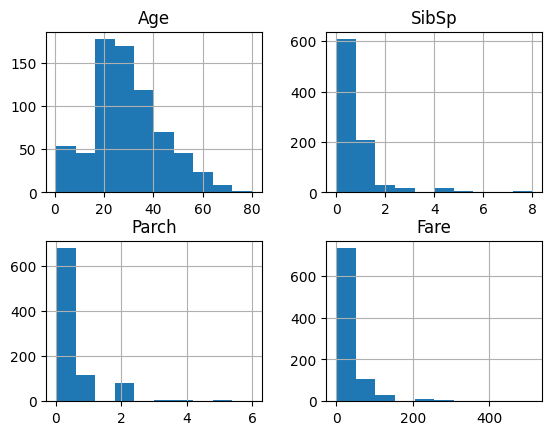

In [16]:
# Univariate Analysis
df.select_dtypes(include= np.number).hist()
# Avoid text
plt.show()

<Axes: xlabel='Fare'>

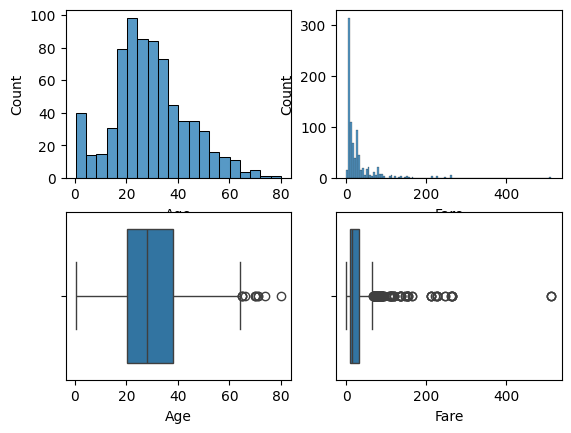

In [18]:
fig, axis = plt.subplots(2, 2)
sns.histplot(ax= axis[0, 0], data= df, x="Age")
sns.boxplot(ax=axis[1, 0], data=df, x="Age")
sns.histplot(ax= axis[0, 1], data= df, x="Fare")
sns.boxplot(ax=axis[1, 1], data=df, x="Fare")

<Axes: xlabel='count', ylabel='Survived'>

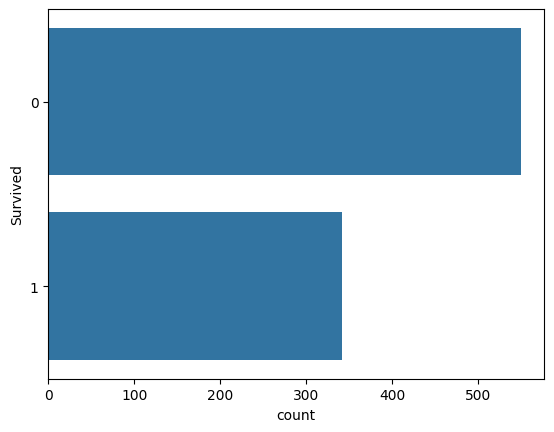

In [19]:
# Univariate Analysis Categorical
sns.countplot(data= df, y= "Survived")

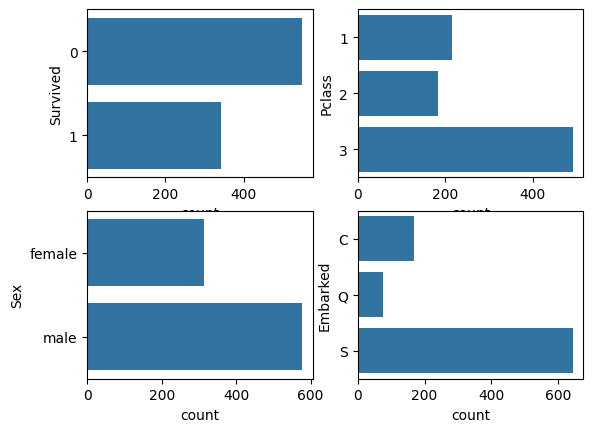

In [20]:
fig, axis = plt.subplots(2, 2)
sns.countplot(ax=axis[0, 0], data= df, y= "Survived")
sns.countplot(ax=axis[0, 1], data= df, y="Pclass")
sns.countplot(ax=axis[1, 0], data= df, y="Sex")
sns.countplot(ax=axis[1, 1], data= df, y="Embarked")
plt.show()

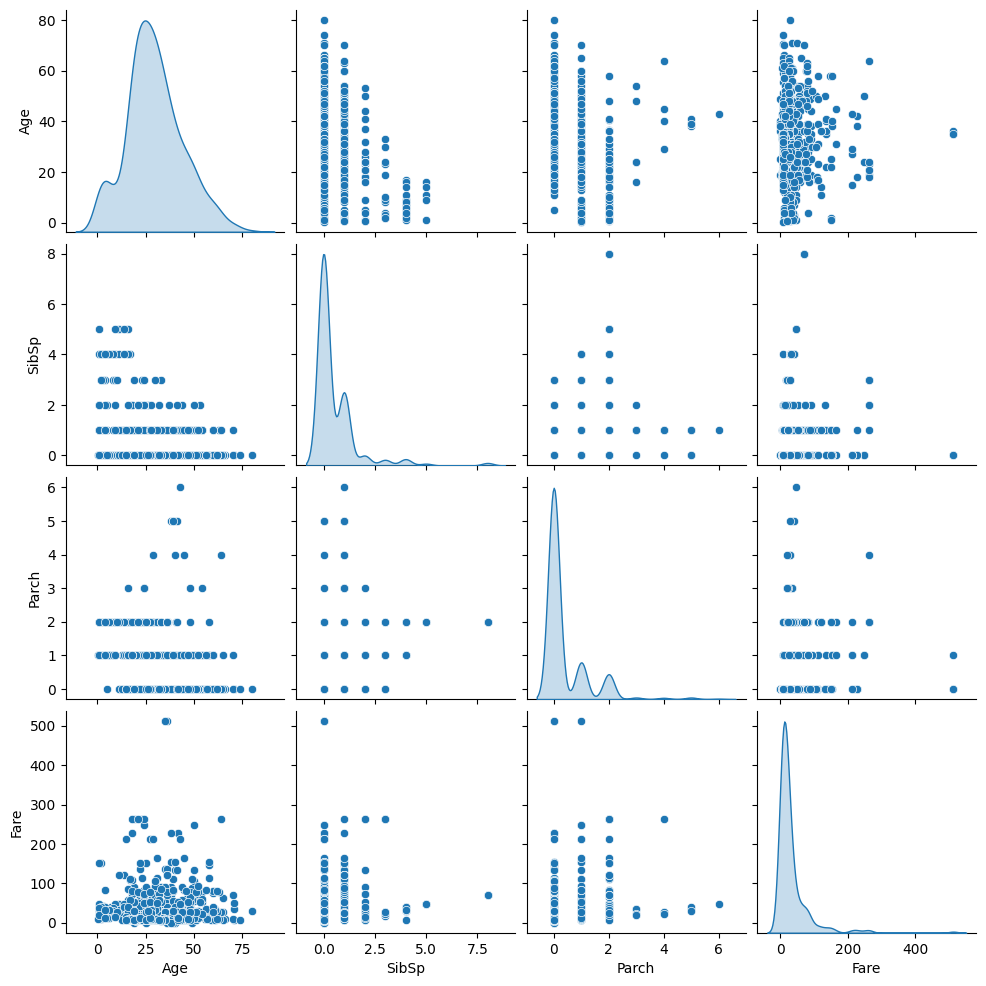

In [21]:
# Analisis bivariado numerico - numerico
sns.pairplot(data= df.select_dtypes(include= np.number), diag_kind='kde')
plt.show()

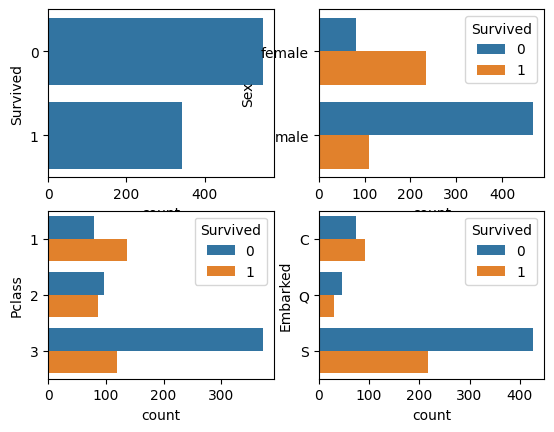

In [22]:
# Analisis bivariado cat -cat
fig, axis = plt.subplots(2, 2)
sns.countplot(ax=axis[0, 0], data= df, y= "Survived")
sns.countplot(ax=axis[1, 0], data= df, y="Pclass", hue="Survived")
sns.countplot(ax=axis[0, 1], data= df, y="Sex", hue= "Survived")
sns.countplot(ax=axis[1, 1], data= df, y="Embarked", hue= "Survived")
plt.show()



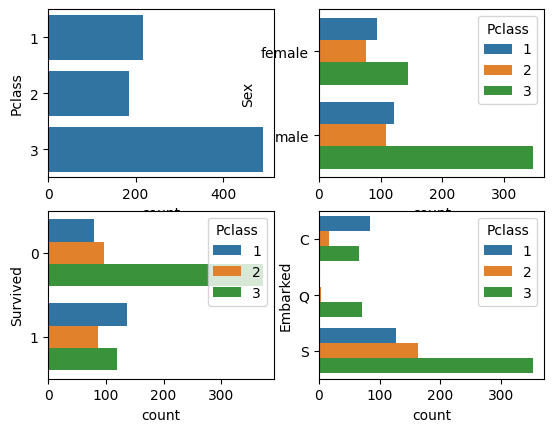

In [23]:
# Analisis bivariado cat -cat
fig, axis = plt.subplots(2, 2)
sns.countplot(ax=axis[0, 0], data= df, y= "Pclass")
sns.countplot(ax=axis[1, 0], data= df, y="Survived", hue="Pclass")
sns.countplot(ax=axis[0, 1], data= df, y="Sex", hue= "Pclass")
sns.countplot(ax=axis[1, 1], data= df, y="Embarked", hue= "Pclass")
plt.show()

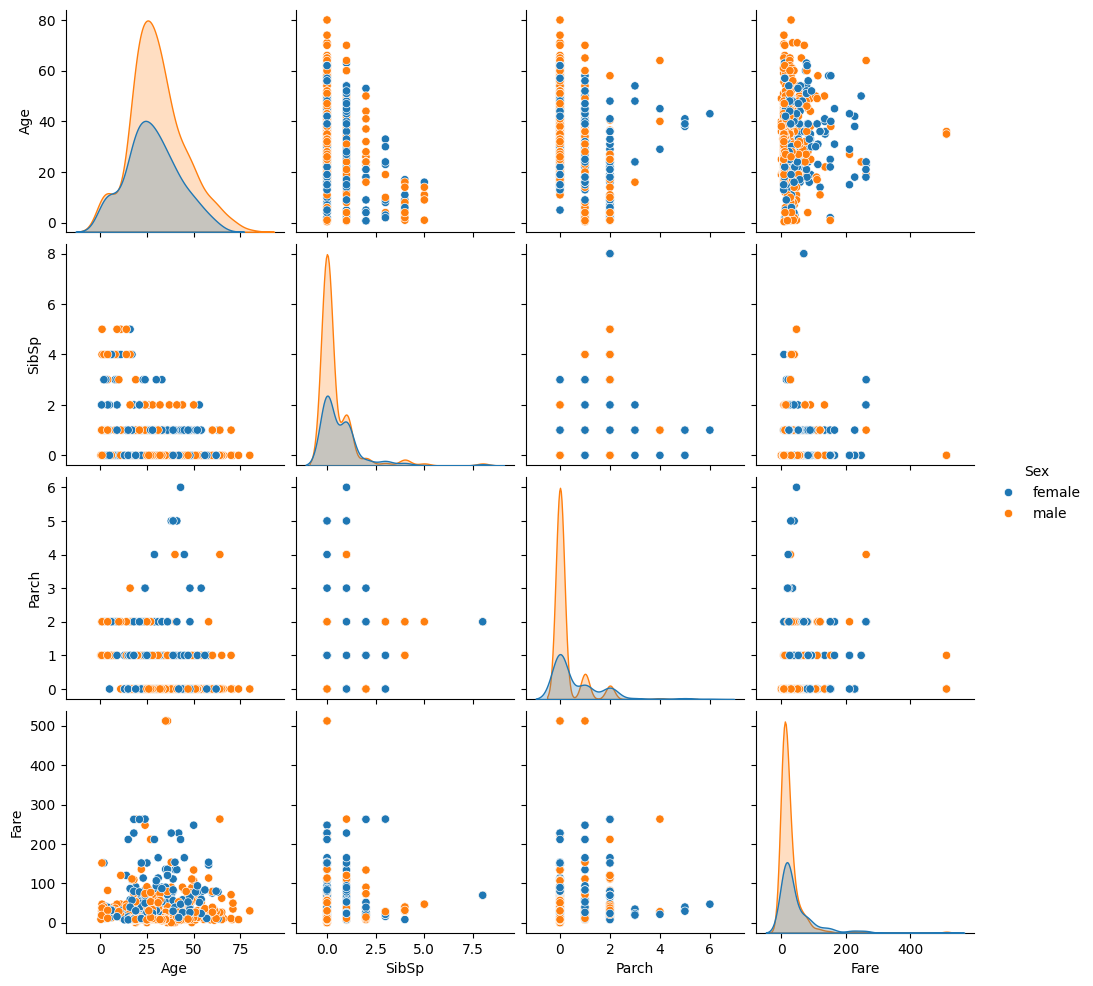

In [24]:
sns.pairplot(data= df, hue="Sex", diag_kind='kde')
plt.show()

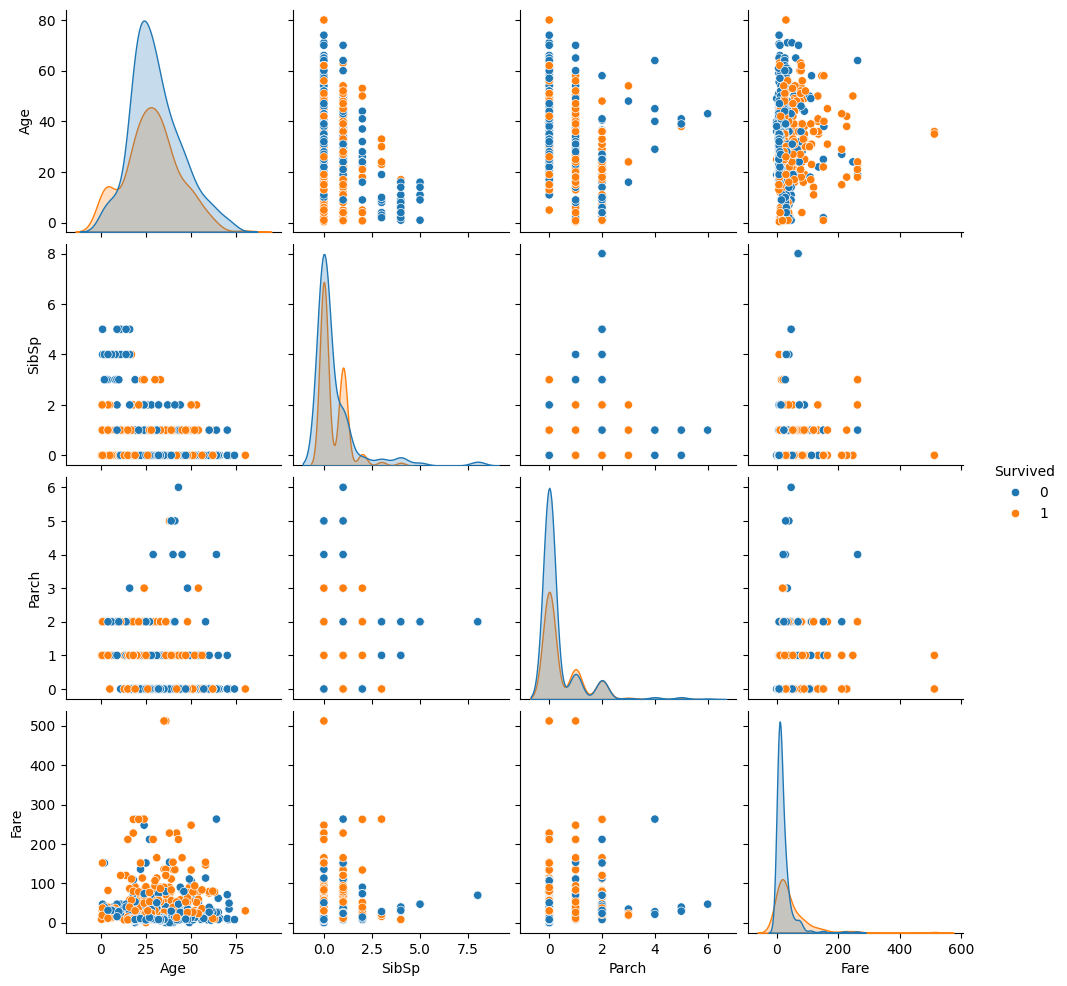

In [25]:
sns.pairplot(data= df, hue="Survived", diag_kind='kde')
plt.show()

In [26]:
df.select_dtypes(include= np.number).corr()

# Corr por defecto utiliza la correlacion Pearson
# Cuando el valor se acerca a 1 es una relación lineal positiva
# Cuando el valor se acerca a -1 es una relación linea negativa
# Cuando el valor tiende a 0 indica que no hay una relación

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


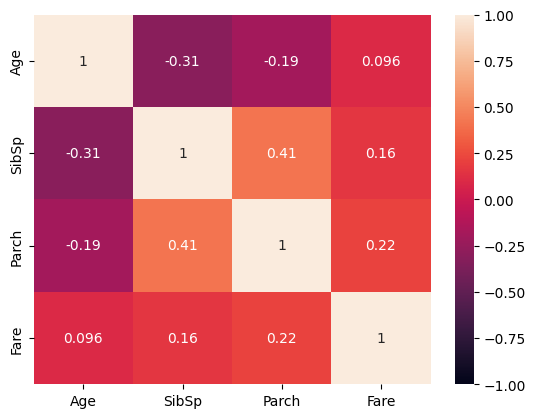

In [27]:
sns.heatmap(df.select_dtypes(include= np.number).corr(), vmin= -1, vmax= 1, annot=True)
plt.show()

In [28]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# For Impute
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [29]:
# Preparing data sets

# Clean Data Set
df["Sex"] = df["Sex"].apply(lambda x: 0 if x == "female" else 1)
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})
df["Embarked"] = pd.Categorical(df["Embarked"])

df_train, df_test = train_test_split(df, random_state=2024, test_size= 0.2)

In [30]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 618 to 648
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  712 non-null    category
 1   Pclass    712 non-null    category
 2   Sex       712 non-null    category
 3   Age       569 non-null    float64 
 4   SibSp     712 non-null    int64   
 5   Parch     712 non-null    int64   
 6   Fare      712 non-null    float64 
 7   Embarked  712 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 31.1 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 829 to 161
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  179 non-null    category
 1   Pclass    179 non-null    category
 2   Sex       179 non-null    category
 3   Age       145 non-null    float64 
 4   SibSp     179 non-null    int64   
 5   Parch     179 non-null    int64   
 6   Fare      179 non-null    float64 
 7   Embarked  177 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 8.2 KB


None

In [31]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
490,0,3,1,NaN,1,0,19.9667,2
224,1,1,1,38.0,1,0,90.0000,2
296,0,3,1,23.5,0,0,7.2292,0
570,1,2,1,62.0,0,0,10.5000,2
562,0,2,1,28.0,0,0,13.5000,2
512,1,1,1,36.0,0,0,26.2875,2
275,1,1,0,63.0,1,0,77.9583,2
468,0,3,1,NaN,0,0,7.7250,1
754,1,2,0,48.0,1,2,65.0000,2
728,0,2,1,25.0,1,0,26.0000,2


In [33]:
cat_cols = df_train.drop("Survived", axis=1).select_dtypes(include='category').columns
num_cols = df_train.drop("Survived", axis=1).select_dtypes(include='number').columns
cat_transformer = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown='ignore'))   
    ]
)

num_transformer = Pipeline(
    steps=[
        ("num_impute",SimpleImputer(strategy='mean'))
    ]
)

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

encode = Pipeline(
    steps=[
        ('preprocessor', preprocessor)
    ]
)

In [34]:
# df_train["Survived"].apply(lambda x: 1 if x == 1 else 0)
# cat_cols
display(df_train.sample(10))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
171,0,3,1,4.0,4,1,29.1250,1
322,1,2,0,30.0,0,0,12.3500,1
759,1,1,0,33.0,0,0,86.5000,2
178,0,2,1,30.0,0,0,13.0000,2
51,0,3,1,21.0,0,0,7.8000,2
499,0,3,1,24.0,0,0,7.7958,2
97,1,1,1,23.0,0,1,63.3583,0
277,0,2,1,NaN,0,0,0.0000,2
418,0,2,1,30.0,0,0,13.0000,2
196,0,3,1,NaN,0,0,7.7500,1


In [35]:
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression())
    ]
)
clf.fit(df_train.drop("Survived", axis= 1), df_train["Survived"].apply(lambda x: 1 if x == 1 else 0))

/Users/rodripinedo/Documents/4GEEKS/repos/my_bootcamp/PRACTICCE_1/titanic/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer())]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Pclass', 'Sex', 'Embarked'], dtype='object'))])),
                ('classifier', LogisticRegression())])

In [36]:
y_pred = clf.predict(df_test.drop("Survived", axis=1))

/Users/rodripinedo/Documents/4GEEKS/repos/my_bootcamp/PRACTICCE_1/titanic/.venv/lib/python3.12/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)
/Users/rodripinedo/Documents/4GEEKS/repos/my_bootcamp/PRACTICCE_1/titanic/.venv/lib/python3.12/site-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [37]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1])

In [39]:
accuracy_score(y_pred, df_test["Survived"])

0.8156424581005587